<h1 align=center> Homework 5 - Support Vector Machines</h1>
<br>
$$
\textbf{Team G} \\
\text{Evangelou Sotiris 2159}\\
\text{Kalais Konstantinos 2146}\\
\text{Chatziefremidis Leuteris 2209}\\
$$

# $\triangleright$ Exercise 1

## Question a : 

###  Load and visualize the data

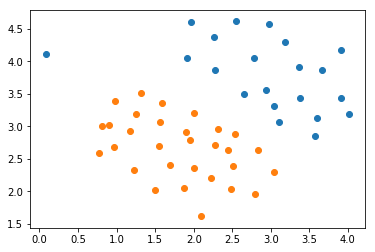

In [3]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report,confusion_matrix 
from scipy.sparse import csc_matrix
from math import *
from sklearn import preprocessing
import scipy.io as sio
import pandas as pd
from sklearn import svm


def plot_data(data,labels):
    #Split the data based on labels
    positive = []
    negative = []
    for i in range(0,len(labels)):
        if(labels[i] == 1):
            positive.append(data[i])
        else:
            negative.append(data[i])
            
    positive =np.array(positive)
    negative =np.array(negative)
    
    #Plot the data
    
    plt.scatter(positive[:,0],positive[:,1])
    plt.scatter(negative[:,0],negative[:,1])
    
    return
    
#Split the data from the file
def load_twofeature(filepath):
    
    #Initialite the regular expression
    regexp = r"([-+]?\d+) 1:([0-9.]+) 2:([0-9.]+)"
    
    #Parse the regular expression
    output = np.fromregex(filepath,regexp,[('label',np.int32),('1',np.float64),('2',np.float64)])
    
    #Parse the ouput of the regex expressio
    labels = []
    features = []
    for i in range(0,len(output['label'])):
        labels.append([output['label'][i]]);
        features.append([output['1'][i],output['2'][i]])
    
    return np.array(features),np.array(labels)
    
#Separate the data in labels,features
data, labels = load_twofeature('ex1Data/twofeature.txt')

#Plot data
plot_data(data,labels)

From a first perspective we can infer that the two classes are linearly separable, although the leftmost blue point seems likely to be misclassified .

### Learn the SVM

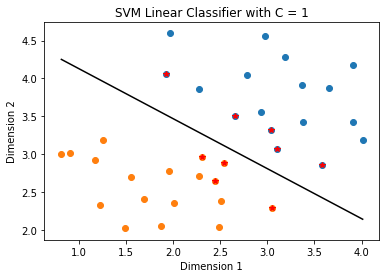

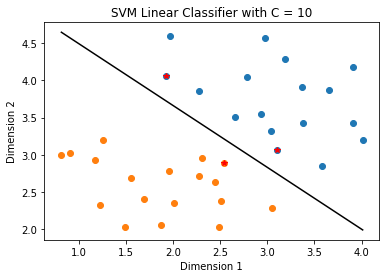

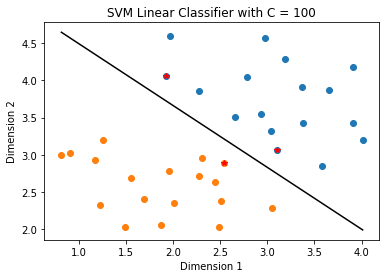

In [4]:
#Split the data 
trainX, testX, trainY, testY = train_test_split(data, labels, test_size=0.30)

def linearSVMForDifferentC(trainX,trainY,testX,testY,C):
    classifier = SVC(kernel='linear', C=C).fit(trainX,trainY)
   
    SVs = classifier.support_vectors_ #support vectors
    sv_coef = classifier.coef_ #weights
    b = classifier.intercept_  #bias

    # Visualize the learned model
    plot_data(trainX,trainY)

    dbDim1 = np.arange(min(trainX[:,0]),max(trainX[:,0]),0.01)
    dbDim2 = -(b + sv_coef[0][0]*dbDim1)/sv_coef[0][1]

    plt.plot(SVs[:,0],SVs[:,1],'r*')
    plt.plot(dbDim1,dbDim2,'k-')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    # highlight support vectors
    plt.title('SVM Linear Classifier with C = %d' %C)
    plt.show()
    
    return(b,sv_coef, SVs)

trainY = trainY.reshape((trainY.shape[0],))
#Test SVM for different C
C = 1
b1,sv_coef1,SVs_1 = linearSVMForDifferentC(trainX,trainY,testX,testY,C)
C = 10
b2,sv_coef2,SVs_2 = linearSVMForDifferentC(trainX,trainY,testX,testY,C)
C = 100
b3,sv_coef3,SVs_3 = linearSVMForDifferentC(trainX,trainY,testX,testY,C)

##### Do you observe any differences in the learned hyperplane for different values of C? In the evolution of the support vectors?

C is a regularization factor of the SVM algorithm. We can see that for C=1 and progressively speaking for lower Cs, the margin is bigger and the supported vectors are more sparse, although for bigger Cs the margin tends to be smaller and the supported vectors less and closer to the decision boundary. With smaller Cs we make the algorithm look for a large margin even though it might have some misclassifications, but it creates a better general decision boundary. As we raise the C value, we are telling the algorithm that we cannot afford to misclassify examples, but the final result is a smaller margin besides the decision boundary.

### Linear kernel

In [5]:
def linear_kernel( xi, xj ):
    K = np.inner(xi,xj)

    return (K)

### Estimate the decision boundary

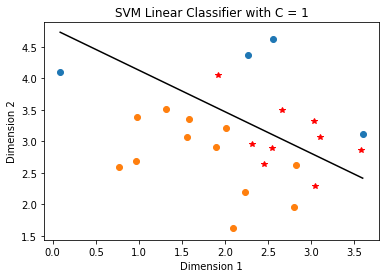

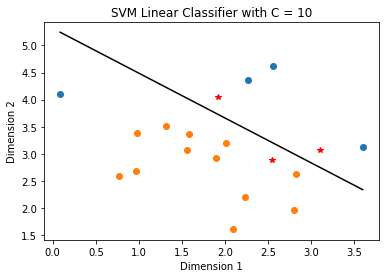

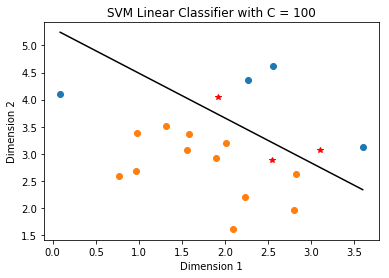

In [6]:
def plot_db(testX,testY,C,b,sv_coef,SVs):
    plot_data(testX,testY)

    dbDim1 = np.arange(min(testX[:,0]),max(testX[:,0]),0.01)
    dbDim2 = -(b + sv_coef[0][0]*dbDim1)/sv_coef[0][1]

    plt.plot(SVs[:,0],SVs[:,1],'r*')
    plt.plot(dbDim1,dbDim2,'k-')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    # highlight support vectors
    plt.title('SVM Linear Classifier with C = %d' %C)
    plt.show()

C=1
plot_db(testX, testY ,C,b1,sv_coef1,SVs_1)
C=10
plot_db(testX, testY ,C,b2,sv_coef2,SVs_2)
C=100
plot_db(testX, testY ,C,b3,sv_coef3,SVs_3)

## Question b : 

### Load the data

In [7]:
#Read the data and transform it from csc to matrices
def load_emails(numTrainDocs):
    
    numTestDocs = 260
    numTokens = 2500
    
    #Prepare the file paths
    features_path_train ="ex1Data/emails/train-features-"+str(numTrainDocs)+".txt"
    features_path_test ="ex1Data/emails/test-features.txt"
    labels_path_train ="ex1Data/emails/train-labels-"+str(numTrainDocs)+".txt"
    labels_path_test ="ex1Data/emails/test-labels.txt"
    
    #Get features and labels for training
    M = np.loadtxt(features_path_train,delimiter=' ')
    
    #Fix the array to start from zero
    for i in range(0,len(M)):
        M[i] = [M[i][0]-1,M[i][1]-1,M[i][2]]
        
    rows = np.array(M[:,0])
    cols = np.array(M[:,1])
    data = np.array(M[:,2])
    
    #Transform the array to compressed column sparse
    features_train = csc_matrix((data, (rows, cols)), shape=(numTrainDocs,numTokens)).toarray()
    labels_train = np.loadtxt(labels_path_train,delimiter=" ")
    
    #Get features and labels for testing
    M = np.loadtxt(features_path_test,delimiter=" ")
    
    #Fix the array to start from zero
    for i in range(0,len(M)):
        M[i] = [M[i][0]-1,M[i][1]-1,M[i][2]]
        
    rows = np.array(M[:,0])
    cols = np.array(M[:,1])
    data = np.array(M[:,2])
    
    features_test = csc_matrix((data, (rows, cols)), shape=(numTestDocs,numTokens)).toarray()
    labels_test = np.loadtxt(labels_path_test,delimiter=" ")
    
    return features_train,features_test,labels_train,labels_test

### Learn and test SVM models - Compute the accuracy


For C :  1  and numTrainDocs:  50
Weights: 
[0.03248772 0.03237351 0.00412509 ... 0.         0.         0.        ]


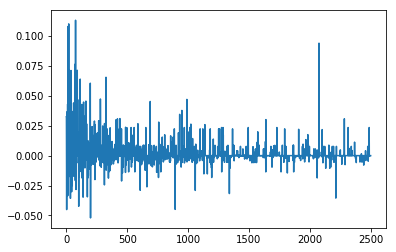

Bias:
[-0.75046627]
Accuracy: 75.38461538461539%
              precision    recall  f1-score   support

         0.0       0.71      0.87      0.78       130
         1.0       0.83      0.64      0.72       130

   micro avg       0.75      0.75      0.75       260
   macro avg       0.77      0.75      0.75       260
weighted avg       0.77      0.75      0.75       260


For C :  1  and numTrainDocs:  100
Weights: 
[ 0.06000452  0.04662052 -0.00140322 ...  0.          0.
  0.        ]


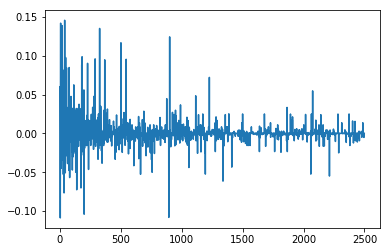

Bias:
[-0.46195665]
Accuracy: 88.46153846153845%
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89       130
         1.0       0.92      0.85      0.88       130

   micro avg       0.88      0.88      0.88       260
   macro avg       0.89      0.88      0.88       260
weighted avg       0.89      0.88      0.88       260


For C :  1  and numTrainDocs:  400
Weights: 
[ 0.06244331 -0.01911266  0.02620208 ...  0.          0.
  0.        ]


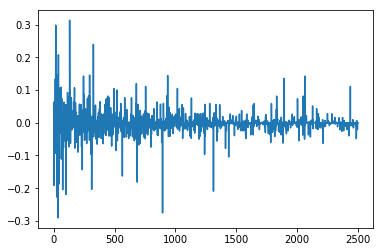

Bias:
[-0.1768724]
Accuracy: 98.07692307692307%
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       130
         1.0       0.98      0.98      0.98       130

   micro avg       0.98      0.98      0.98       260
   macro avg       0.98      0.98      0.98       260
weighted avg       0.98      0.98      0.98       260


For C :  1  and numTrainDocs:  700
Weights: 
[ 0.07237022  0.00506238  0.05545812 ... -0.0004468   0.
  0.00357667]


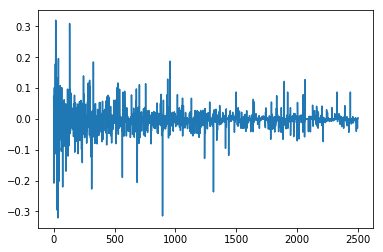

Bias:
[-0.06276725]
Accuracy: 98.46153846153847%
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       130
         1.0       0.98      0.98      0.98       130

   micro avg       0.98      0.98      0.98       260
   macro avg       0.98      0.98      0.98       260
weighted avg       0.98      0.98      0.98       260



In [8]:
def learn_and_test(numTrainDocs):
    
    #Get the data and split it to test,train
    [trainX,testX,trainY,testY] =load_emails(numTrainDocs)
    
    #Fit the model and train it
    C = 1
    svc = svm.SVC(kernel='linear', C=C).fit(trainX,trainY)
    
    print()
    print("For C : ",C," and numTrainDocs: ",numTrainDocs)
    print("Weights: ")
    print(svc.coef_[0])
    plt.plot(svc.coef_[0])
    plt.show()
    print("Bias:")
    print(svc.intercept_) 

     #Calculate the accuracy   
    print("Accuracy: {}%".format(svc.score(testX, testY) * 100 ))

    #Print out some metrics
    yPred = svc.predict(testX) 
    print(classification_report(testY, yPred))
    
#learn and test for different files
learn_and_test(50)
learn_and_test(100)
learn_and_test(400)
learn_and_test(700)

#### As number of training Docs rises we notice that:
The weight graph is starting to get a certain shape so the weights gradually converge to a certain value. <br>
Obviously, as with every Machine Learning algorithm we have seen so far, with a large training size we have the ability to train the model better, make it adapt to more occasions of input data and make more accurate predictions. <br>
Also,we said earlier that a low C (like C=1) is affording some misclassification (especially with low train size) but provides a better general solution. Thus, we can see from the very start that as the problem's size raises (becoming more general) the misclassifications are way less in comparison, because the problem is solved in a better and more general way. 

# $\triangleright$ Exercise 2

## Question a:

### Load and visualize data.

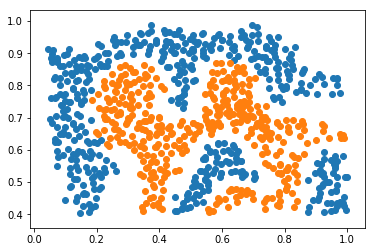

In [29]:
# Load and plot data.
data,labels = load_twofeature('ex2Data/ex2a.txt')
plot_data(data,labels)

### Learn the SVM model

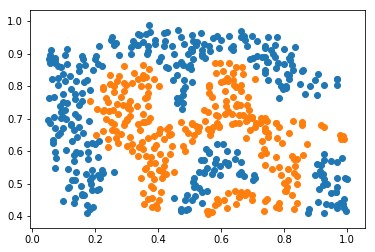

In [30]:
# Set the gamma parameter
gamma = 100
# set the C value
C = 1 

#Training the model
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.30)

y_train = y_train.reshape((y_train.shape[0],)) # added for warning avoidance
classifier = SVC(kernel="rbf",C=C,gamma=gamma).fit(X_train,y_train)

# Visualize the learned model
plot_data(X_train,y_train)

### RBF Kernel

In [14]:
def rbf_kernel( xi, xj, gamma ):
    K = exp(-gamma * np.linalg.norm(xi-xj,ord=2)**2 )
    
    return(K)

### Visualize the decision cost

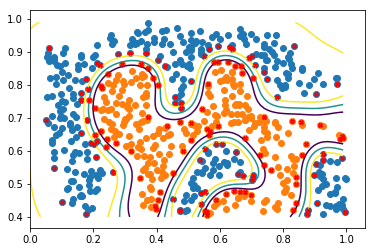

In [35]:
def rbf_scoring_function(x,SVs,yi_ai,b,gamma):
    score = 0
    for i in range(len(yi_ai[0])):
        score += yi_ai[0][i]*rbf_kernel(x,SVs[i],gamma)

    return(score + b)

# Plot the image and the contours of scoring function
def plot_data_contour(X_train,y_train,classifier,gamma):
    step = 0.01
    [X,Y] = np.mgrid[0:1:step,0.4:1:step]

    X=X.T
    Y=Y.T
    Z = np.zeros(X.shape)

    SVs = classifier.support_vectors_ #support vectors
    yi_ai = classifier.dual_coef_
    b = classifier.intercept_  #bias

    for i in range(len(X)):
        for j in range(len(X[0])):
            Z[i,j] = rbf_scoring_function([X[i,j],Y[i,j]],SVs,yi_ai,b,gamma)

    positive = []
    negative = []
    for i in range(0,len(y_train)):
        if(y_train[i] == 1):
            positive.append(X_train[i])
        else:
            negative.append(X_train[i])
            
    positive =np.array(positive)
    negative =np.array(negative)
    
    plt.plot(SVs[:,0],SVs[:,1],"rX",markersize = 4)
    plt.scatter(positive[np.where(positive[:,1]>=0.4),0],positive[np.where(positive[:,1]>=0.4),1])
    plt.scatter(negative[np.where(negative[:,1]>=0.4),0],negative[np.where(negative[:,1]>=0.4),1])
    c=plt.contour(X,Y,Z,levels=[-0.5,0,0.5],color='k')
    
    plt.show()
    
    return(len(SVs))
    
len_SVS = plot_data_contour(X_train,y_train,classifier,gamma)

## Question b:

### Load and visualize data

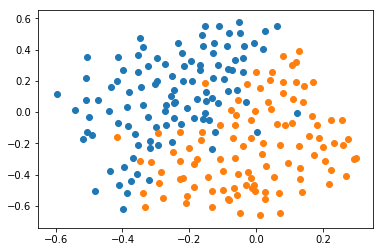

In [36]:
#Split the data from the file(Different from first --> Negative zeros inside)
def load_twofeatures_with_negatives(filepath):
    
    #Initialite the regular expression
    regexp = r"([-+]?\d+) 1:([-+]?[0-9.]+) 2:([-+]?[0-9.]+)"
    
    #Parse the regular expression
    output = np.fromregex(filepath,regexp,[('label',np.int32),('1',np.float64),('2',np.float64)])
    
    #Parse the ouput of the regex expression
    labels = []
    features = []
    for i in range(0,len(output['label'])):
        labels.append([output['label'][i]]);
        features.append([output['1'][i],output['2'][i]])
    
    return np.array(features),np.array(labels)

data, labels = load_twofeatures_with_negatives('ex2Data/ex2b.txt')

plot_data(data,labels)

From an eye perspective the classes are not strictly separable. <br>But a high accuracy general decision boundary can be found, so that only a few misclassifications exist.

### Learn SVM models for different hyperparameter values

In [38]:
# Set the parameters
C = np.array([1,1000])
gamma = np.array([1,10,100,1000])

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.30)

for i in range(len(C)):
    for j in range(len(gamma)):
        classifier = SVC(kernel="rbf",C=C[i],gamma=gamma[j])
        y_train = y_train.reshape((y_train.shape[0],))
        classifier.fit(X_train, y_train)
        SVs = classifier.support_vectors_ #support vectors
        
        print("For C : ",C[i]," Gamma: ",gamma[j]) 
        print("Number of Support Vectors: %d" %len(SVs))
        print("Accuracy: {}%".format(classifier.score(X_test, y_test) * 100 ))
        print('\n')

For C :  1  Gamma:  1
Number of Support Vectors: 68
Accuracy: 90.625%


For C :  1  Gamma:  10
Number of Support Vectors: 54
Accuracy: 92.1875%


For C :  1  Gamma:  100
Number of Support Vectors: 106
Accuracy: 90.625%


For C :  1  Gamma:  1000
Number of Support Vectors: 147
Accuracy: 79.6875%


For C :  1000  Gamma:  1
Number of Support Vectors: 36
Accuracy: 92.1875%


For C :  1000  Gamma:  10
Number of Support Vectors: 34
Accuracy: 90.625%


For C :  1000  Gamma:  100
Number of Support Vectors: 71
Accuracy: 90.625%


For C :  1000  Gamma:  1000
Number of Support Vectors: 147
Accuracy: 81.25%




## Question c : 

### Load the data - Cross validation

In [39]:
#Separate the data in labels,features
[features,labels]=load_twofeatures_with_negatives('ex2Data/ex2b.txt')

#Shuffle the data 
R = np.random.randint(0,211,211)
features=features[R,:]
labels = labels[R]

#Build 3 sets for cross-validation
n=70
V1 = features[0:n,:]
labelsV1 = labels[0:n,:]

V2 = features[n:2*n,:]
labelsV2 = labels[n:2*n,:]

V3 = features[2*n:len(features),:]
labelsV3 = labels[2*n:len(features),:];

#Array with 3 sets 
V = np.array([V1,V2,V3])
L = np.array([labelsV1,labelsV2,labelsV3])

### Perform cross-validation

In [40]:
#Create a meshgrid of (C,gamma) parameters
[X,Y] = np.meshgrid(np.logspace(-1,3,5),np.logspace(-1,3,5))

#Accuracy array 
A = np.zeros(shape=X.shape)

n=3
#Check the accuracy for every C,gamma that we generated
for i in range(0,len(X)):
    for j in range(0,len(X[0])):
        
        #Get the parameters
        C = X[i][j]
        gamma = Y[i][j]
        acc = np.zeros(n)
        
        #For the 3 folds run the SVM with 2 of 3 as training set and 1 as test
        for k in range(0,n):
            
            #Prepare the data 
            testFeatures = V[k]
            testLabels = L[k].flatten()
            
            trainFeatures = np.concatenate((V[(k-1)% n],V[(k+1)% n]),axis=0)
            trainLabels = np.concatenate((L[(k-1)% n],L[(k+1)% n]),axis=0)
            
            #Train the model
            svc = svm.SVC(kernel='rbf', C=C,gamma=gamma).fit(trainFeatures,trainLabels.flatten())
            
            #Test the model 
            predictedLabels = svc.predict(testFeatures)
            
            #Calculate the accuracy 
            acc[k] = svc.score(testFeatures, testLabels)
        
        #Calculate the mean accuracy for all the folds
        A[i][j] = np.mean(acc)

#Best combination of parameters
[max_i,max_j] = np.where(A == np.amax(A))

#Retrieve the parameters
C_max = X[max_i[0]][max_j[0]]
gamma_max = Y[max_i[0]][max_j[0]]
A_max = A[max_i[0]][max_j[0]]

print("Best parameters are C: ",C_max," gamma: ",gamma, " Score: ",A_max)

Best parameters are C:  10.0  gamma:  1000.0  Score:  0.9525821596244132


The results for gamma and C values we get from cross-validating were expected to an extent. <br>
The C is mid-low, because we can allow some misclassification as the classes not separable, and a high C value would lead to a very complex line with very small margins.A lower C of say 1 would also lead to a lot more misclassifications than this because of the big margin (we can see that the two classes don't have much distance between them). <br>
Also, to solve the problem we used an RBF kernel to project the points into a higher dimension. Gamma value controls the peak of the RBF "bell". Since we needed a high bias- low variance solution, we got to use a high gamma value, which is 1000. That way, and in a simple manner of speaking, the points that are considered similar are the points that are closer with each other, and closer to the support vectors.